In [26]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.generalized_linear_model import GLM
from patsy import dmatrices
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
df_diabetes = pd.read_csv("DrugsDiabetes.csv")
df_diabetes.head()

,ID,Pres,Drug,Age
0,1,26,A,Y
1,2,30,A,Y
2,3,54,A,Y
3,4,25,A,Y
4,5,70,A,Y


In [3]:
df_diabetes.describe()

,ID,Pres
count,54.000000,54.000000
mean,27.500000,28.148148
std,15.732133,13.198638
min,1.000000,10.000000
25%,14.250000,18.250000
50%,27.500000,26.000000
75%,40.750000,34.000000
max,54.000000,70.000000


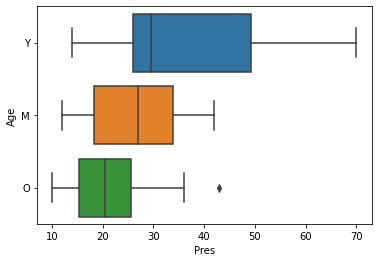

In [6]:
sns.boxplot(data=df_diabetes, x = "Pres", y = "Age")

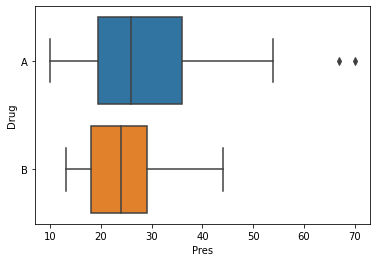

In [7]:
sns.boxplot(data=df_diabetes, x = "Pres", y = "Drug")

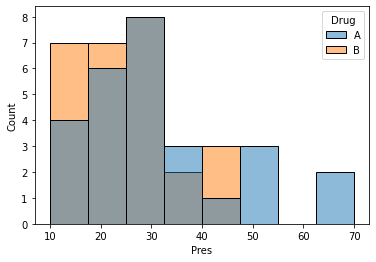

In [9]:
sns.histplot(data=df_diabetes, x="Pres", hue="Drug")

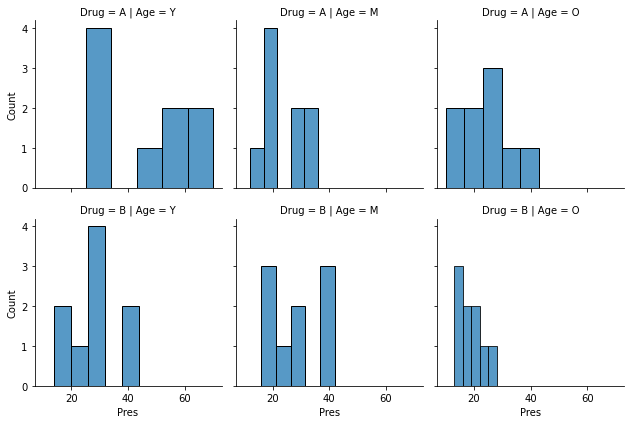

In [10]:
g = sns.FacetGrid(df_diabetes, col="Age", row="Drug")
g.map_dataframe(sns.histplot, x="Pres")

In [28]:
def model_Poisson(y,X):
    model = GLM(endog=y, exog=X, family=sm.families.Poisson())
    results = model.fit()
    return results

In [39]:
expr = """Pres ~ Drug"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_Poisson(y,X).summary()
print(model_Poisson(y,X).summary2())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -278.00
Date:                Sun, 20 Mar 2022   Deviance:                       281.33
Time:                        09:38:39   Pearson chi2:                     300.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4352      0.035     99.442      0.000       3.367       3.503
Drug[T.B]     -0.2060      0.052     -3.994      0.000      -0.307      -0.105
==============================================================================
"""

              Results: Generalized linear model
Model:              GLM              AIC:            559.9975
Link Function:      log              BIC:            73.9063 
Dependent Variable: Pres             Log-Likelihood: -278.00 
Date:               2022-03-20 09:38 LL-Null:        -286.02 
No. Observations:   54               Deviance:       281.33  
Df Model:           1                Pearson chi2:   300.    
Df Residuals:       52               Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      3.4352   0.0345 99.4424 0.0000  3.3675  3.5029
Drug[T.B]     -0.2060   0.0516 -3.9943 0.0001 -0.3071 -0.1049



In [40]:
expr = """Pres ~ Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_Poisson(y,X).summary()
model_Poisson(y,X).summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       51
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -250.55
Date:                Sun, 20 Mar 2022   Deviance:                       226.43
Time:                        09:40:19   Pearson chi2:                     235.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2729      0.046     71.332      0.000       3.183       3.363
Age[T.O]      -0.1972      0.068     -2.885      0.004      -0.331      -0.063
Age[T.Y]       0.3213      0.060      5.332      0.000       0.203       0.439
==============================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            507.0947
Link Function:      log              BIC:            22.9925 
Dependent Variable: Pres             Log-Likelihood: -250.55 
Date:               2022-03-20 09:40 LL-Null:        -286.02 
No. Observations:   54               Deviance:       226.43  
Df Model:           2                Pearson chi2:   235.    
Df Residuals:       51               Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      3.2729   0.0459 71.3321 0.0000  3.1830  3.3629
Age[T.O]      -0.1972   0.0683 -2.8854 0.0039 -0.3311 -0.0632
Age[T.Y]       0.3213   0.0603  5.3317 0.0000  0.2032  0.4394
=============================================================

"""

In [41]:
expr = """Pres ~ Age + Drug """
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
print(model_Poisson(y,X).summary())
print(model_Poisson(y,X).summary2())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       50
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.53
Date:                Sun, 20 Mar 2022   Deviance:                       210.39
Time:                        09:41:23   Pearson chi2:                     213.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3706      0.051     65.593      0.0

In [43]:
expr = """Pres ~ Age + Drug + Age*Drug"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_Poisson(y,X).summary()
model_Poisson(y,X).summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -228.48
Date:                Sun, 20 Mar 2022   Deviance:                       182.31
Time:                        09:41:50   Pearson chi2:                     181.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.1781      0.068     46.708      0.000       3.045       3.311
Age[T.O]               0.0229      0.096      0.239      0.811      -0.165       0.210
Age[T.Y]               0.6187      0.084      7.330      0.000       0.453       0.784
Drug[T.B]              0.1815      0.092      1.970      0.049       0.001       0.362
Age[T.O]:Drug[T.B]    -0.4498      0.138     -3.269      0.001      -0.719      -0.180
Age[T.Y]:Drug[T.B]    -0.6382      0.122     -5.224      0.000      -0.878      -0.399
======================================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
==================================================================
Model:                 GLM               AIC:             468.9692
Link Function:         log               BIC:             -9.1661 
Dependent Variable:    Pres              Log-Likelihood:  -228.48 
Date:                  2022-03-20 09:41  LL-Null:         -286.02 
No. Observations:      54                Deviance:        182.31  
Df Model:              5                 Pearson chi2:    181.    
Df Residuals:          48                Scale:           1.0000  
Method:                IRLS                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept           3.1781   0.0680 46.7077 0.0000  3.0447  3.3114
Age[T.O]            0.0229   0.0957  0.2392 0.8110 -0.1646  0.2104
Age[T.Y]            0.6187   0.0844  7.3304 0.0000  0.4533  0.7841
Drug[T.B]           0.1815   0.0921  1.9703 0.0488  0.0009  0.3621
Age[T.O]:Drug[T.B] -0.4498   0.1376 -3.2691 0.0011 -0.7195 -0.1801
Age[T.Y]:Drug[T.B] -0.6382   0.1222 -5.2244 0.0000 -0.8776 -0.3988
==================================================================

"""

In [33]:
## Negative Binomial
def model_NegBionomial(y,X):
    model = GLM(endog=y, exog=X, family=sm.families.NegativeBinomial())
    results = model.fit()
    return results


In [44]:
expr = """Pres ~ Drug"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_NegBionomial(y,X).summary()
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -234.90
Date:                Sun, 20 Mar 2022   Deviance:                       9.4515
Time:                        09:42:15   Pearson chi2:                     9.96
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4352      0.196     17.569      0.000       3.052       3.818
Drug[T.B]     -0.2060      0.277     -0.744      0.457      -0.749       0.337
==============================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            473.7920 
Link Function:      log              BIC:            -197.9756
Dependent Variable: Pres             Log-Likelihood: -234.90  
Date:               2022-03-20 09:42 LL-Null:        -235.17  
No. Observations:   54               Deviance:       9.4515   
Df Model:           1                Pearson chi2:   9.96     
Df Residuals:       52               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    3.4352    0.1955  17.5689  0.0000   3.0520  3.8184
Drug[T.B]   -0.2060    0.2770  -0.7436  0.4571  -0.7489  0.3369
==============================================================

"""

In [45]:
expr = """Pres ~ Age"""
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_NegBionomial(y,X).summary()
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       51
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.96
Date:                Sun, 20 Mar 2022   Deviance:                       7.5890
Time:                        09:43:38   Pearson chi2:                     7.75
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2729      0.240     13.630      0.000       2.802       3.744
Age[T.O]      -0.1972      0.340     -0.579      0.562      -0.864       0.470
Age[T.Y]       0.3213      0.339      0.949      0.343      -0.343       0.985
==============================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            473.9294 
Link Function:      log              BIC:            -195.8492
Dependent Variable: Pres             Log-Likelihood: -233.96  
Date:               2022-03-20 09:43 LL-Null:        -235.17  
No. Observations:   54               Deviance:       7.5890   
Df Model:           2                Pearson chi2:   7.75     
Df Residuals:       51               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    3.2729    0.2401  13.6301  0.0000   2.8023  3.7436
Age[T.O]    -0.1972    0.3403  -0.5795  0.5623  -0.8641  0.4697
Age[T.Y]     0.3213    0.3387   0.9486  0.3428  -0.3426  0.9852
==============================================================

"""

In [46]:
expr = """Pres ~ Age + Drug """
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_NegBionomial(y,X).summary()
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       50
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.75
Date:                Sun, 20 Mar 2022   Deviance:                       7.1640
Time:                        09:44:04   Pearson chi2:                     7.05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3759      0.277     12.187      0.000       2.833       3.919
Age[T.O]      -0.2168      0.340     -0.637      0.524      -0.884       0.450
Age[T.Y]       0.2934      0.339      0.866      0.386      -0.371       0.957
Drug[T.B]     -0.1823      0.277     -0.658      0.511      -0.726       0.361
==============================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            475.5045 
Link Function:      log              BIC:            -192.2852
Dependent Variable: Pres             Log-Likelihood: -233.75  
Date:               2022-03-20 09:44 LL-Null:        -235.17  
No. Observations:   54               Deviance:       7.1640   
Df Model:           3                Pearson chi2:   7.05     
Df Residuals:       50               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    3.3759    0.2770  12.1872  0.0000   2.8330  3.9188
Age[T.O]    -0.2168    0.3403  -0.6371  0.5241  -0.8837  0.4502
Age[T.Y]     0.2934    0.3388   0.8662  0.3864  -0.3705  0.9574
Drug[T.B]   -0.1823    0.2772  -0.6578  0.5107  -0.7257  0.3610
==============================================================

"""

In [47]:
expr = """Pres ~ Age + Drug + Drug*Age """
y, X = dmatrices(expr, df_diabetes, return_type='dataframe')
model_NegBionomial(y,X).summary()
model_NegBionomial(y,X).summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pres   No. Observations:                   54
Model:                            GLM   Df Residuals:                       48
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.29
Date:                Sun, 20 Mar 2022   Deviance:                       6.2330
Time:                        09:45:22   Pearson chi2:                     5.93
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.1781      0.340      9.342      0.000       2.511       3.845
Age[T.O]               0.0229      0.481      0.048      0.962      -0.920       0.966
Age[T.Y]               0.6187      0.479      1.292      0.196      -0.320       1.557
Drug[T.B]              0.1815      0.480      0.378      0.705      -0.760       1.123
Drug[T.B]:Age[T.O]    -0.4498      0.681     -0.661      0.509      -1.784       0.884
Drug[T.B]:Age[T.Y]    -0.6382      0.678     -0.942      0.346      -1.967       0.690
======================================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:               GLM               AIC:             478.5735 
Link Function:       log               BIC:             -185.2382
Dependent Variable:  Pres              Log-Likelihood:  -233.29  
Date:                2022-03-20 09:45  LL-Null:         -235.17  
No. Observations:    54                Deviance:        6.2330   
Df Model:            5                 Pearson chi2:    5.93     
Df Residuals:        48                Scale:           1.0000   
Method:              IRLS                                        
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           3.1781   0.3402  9.3415 0.0000  2.5113 3.8448
Age[T.O]            0.0229   0.4810  0.0476 0.9621 -0.9199 0.9657
Age[T.Y]            0.6187   0.4789  1.2919 0.1964 -0.3199 1.5573
Drug[T.B]           0.1815   0.4803  0.3780 0.7055 -0.7599 1.1230
Drug[T.B]:Age[T.O] -0.4498   0.6807 -0.6608 0.5087 -1.7840 0.8844
Drug[T.B]:Age[T.Y] -0.6382   0.6778 -0.9416 0.3464 -1.9666 0.6902
=================================================================

"""